# Final Project: Phase 3 (Final Submission)

## Name & NetID: Jason Zheng, jz449

## Introduction:
The purpose of this project is to analyze data gathered from Johns Hopkins CSSE regarding the progression of the COVID-19 outbreak with WHOIS data for malicious online activity related to the pandemic. In regards to my main research question, I hope to find the relationship between the outbreak of COVID-19 and COVID-19 themed malicious website activity. Specifically, the goal is to gauge whether or not the intensity of the outbreak significantly affected the number of registrations of malicious COVID-19 themed websites, and if so, by how much. In addition, I hope to find other interesting pieces of information related to the data, including the most popular domain registrars and most popular extensions for these malicious websites. 

## Data Description:
_1. What are the observations (rows) and the attributes (columns)?_

For the analysis-ready U.S COVID-19 dataset, the rows represent daily total counts across the United States. The attributes are 'Confirmed' (total number of confirmed cases), 'Deaths' (total number of deaths), 'Recovered' (total number of recoveries), 'Date', 'Daily Confirmed', 'Daily Deaths', and 'Daily Recovered'. The 'Daily' attributes are simply the change in their respective attributes on each 'Date'.

For the analysis-ready malicious, COVID-19 themed domain counts dataset, the observations represent daily counts of registered, malicious websites with domains related to 4 text strings: 'covid', 'corona', 'virus', 'vaccine', and 'cure'. The attributes are 'Date', 'Count' (number of registrations on 'Date'), and 'Cumulative Count' (total number of registrations up until 'Date').

The last dataset used for analysis contains all the registrar names and extensions of the malicious, COVID-19 themed domains that were observed. The rows represent a single observation or website, and the attributes are 'registrarName' (name of registrar) & 'Ext.' (extension).

_2. Why was this dataset created?_

The API which enabled the U.S COVID-19 dataset to be formed was created to help build dashboards and mobile apps to track COVID-19 with the latest information. The original WHOIS domain dataset for malicious COVID-19 themed websites was created to enable ProPrivacy's COVID-19 Malicious Domain Research Hub to begin collecting the data related to malicious activity, and to create the single largest repository of open data related to malicious online actvity.

_3. Who funded the creation of the dataset?_

The original COVID-19 data is sourced from the Johns Hopkins Center for Systems Science and Engineering, while the API used to access the data was created by Kyle Redelinghuys. ProPrivacy partnered with VirusTotal, a subsidiary of Alphabet, as well as WHOIS XML API to make the WHOIS domain data available.

_4. What processes might have influenced what data was observed and recorded and what was not?_

The COVID-19 data was collected from U.S. county and state health departments, multiple national government health departments, as well as data aggregating websites which rely on a combination of reporting from local health departments and local media reports. Thus, the accuracy and reliability of the data depends on whether or not these sources reported their results rigorously.

The ProPrivacy database is focused on identifying malicious domains related to 4 text strings: 'covid', 'corona', 'virus', 'vaccine', & 'cure'. The primary source of data is global WHOIS datasets provided by WHOIS XML API dating back to the start of the pandemic, which cover all major TLDs & ccTLDs.

_5. What preprocessing was done, and how did the data come to be in the form that you are using?_

From the COVID-19 API (which sourced data from the JHU CSSE public Github repository), I converted the JSON files' data to Pandas dataframes. In the dataframe, I dropped unnecessary columns, filtered for U.S totals data, and converted dates to a year-month-day Python datetime format.

From a link on ProPrivacy's COVID-19 Malicious Domain Research Hub, I downloaded WHOIS data as a .csv file and converted it to a Pandas dataframe. In the dataframe, I dropped unnecessary columns and converted dates to a year-month-day Python datetime format. To create the first analysis-ready dataset of counts, I first dropped any entires with missing registration dates. Then, I grouped the entries by date and used the Pandas size() and cumsum() methods to create counts. To create the second analysis-ready dataset of registrar names and extensions, I simply dropped all other columns besides 'registrarName' and 'Ext.'.

Finally, I exported the three analysis-ready datasets as .json files to be read by this final Jupyter Notebook.

_6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?_

The original COVID-19 data collection by JHU was developed to provide researchers, public health authorities and the general public with a dashboard to track the outbreak. People were not involved with the WHOIS data collection of malicious domains.

_7. Where can your raw source data be found, if applicable?_
- Raw COVID-19 data from API: https://api.covid19api.com/all
- Raw WHOIS data .csv file: https://cornell.box.com/s/hnrz1qi0frl6e3o8ajbhfe8mmbb89xy1

In [39]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import io
import sys
import datetime
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LinearRegression
from scipy.special import comb
from scipy.stats import spearmanr
from scipy.stats import linregress

## Data Analysis

### Summarizing & Visualzing Data

In [40]:
plt.style.use("seaborn")

In [41]:
df_covid = pd.read_json(r'us_covid.json')
df_domains_counts = pd.read_json(r'domaincounts.json')
df_domains_regext = pd.read_json(r'domains.json')

First, let's take a glance at the data we've imported from the json files as Pandas DataFrames.

In [42]:
df_covid.tail()

,Country,Confirmed,Deaths,Recovered,Date,Daily Confirmed,Daily Deaths,Daily Recovered
395213,United States of America,1390406,84119,243430,2020-05-13,21030.0,1763.0,13143.0
399706,United States of America,1417774,85898,246414,2020-05-14,27368.0,1779.0,2984.0
403709,United States of America,1442824,87530,250747,2020-05-15,25050.0,1632.0,4333.0
405260,United States of America,1467820,88754,268376,2020-05-16,24996.0,1224.0,17629.0
408330,United States of America,1486757,89562,272265,2020-05-17,18937.0,808.0,3889.0


In [43]:
df_domains_counts.tail()

,Date,Count,Cumulative Count
123,2020-04-18,69,48874
124,2020-04-19,88,48962
125,2020-04-20,79,49041
126,2020-04-21,44,49085
127,2020-04-22,14,49099


In [44]:
df_domains_regext.tail()

,registrarName,Ext.
92949,Cronon AG,.info
92952,Mesh Digital Limited,.org
92953,Mesh Digital Limited,.org
92955,home.pl S.A.,.pl
92956,Metaregistrar B.V.,.nl


Now let's visualize the plots of confirmed cases, recoveries, and deaths from the U.S COVID-19 data.

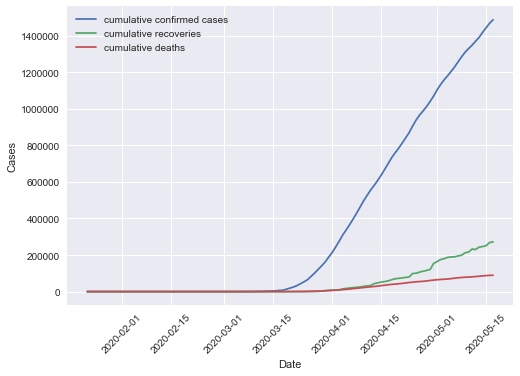

In [45]:
plt.plot(df_covid['Date'], df_covid['Confirmed'], label='cumulative confirmed cases')
plt.plot(df_covid['Date'], df_covid['Recovered'], label='cumulative recoveries')
plt.plot(df_covid['Date'], df_covid['Deaths'], label='cumulative deaths')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.ylabel('Cases')
plt.xlabel('Date')
plt.show()

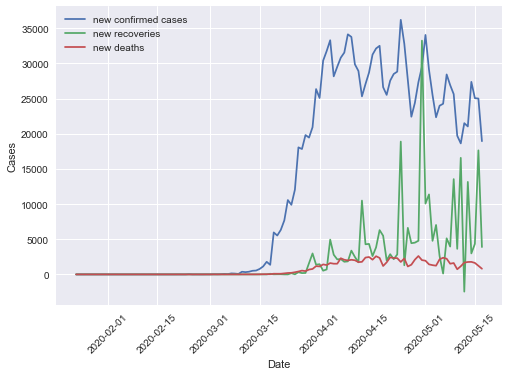

In [46]:
plt.plot(df_covid['Date'], df_covid['Daily Confirmed'], label='new confirmed cases')
plt.plot(df_covid['Date'], df_covid['Daily Recovered'], label='new recoveries')
plt.plot(df_covid['Date'], df_covid['Daily Deaths'], label='new deaths')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.ylabel('Cases')
plt.xlabel('Date')
plt.show()

In [47]:
print('Mean new confirmed cases per day: ' + str(round(df_covid['Daily Confirmed'].mean(), 0)))
print('Standard deviation of new confirmed cases: ' + str(round(np.std(df_covid['Daily Confirmed']),0)))
print('\n')
print('Mean new recoveries per day: ' + str(round(df_covid['Daily Recovered'].mean(), 0)))
print('Standard deviation of new recoveries: ' + str(round(np.std(df_covid['Daily Recovered']),0)))
print('\n')
print('Mean new deaths per day: ' + str(round(df_covid['Daily Deaths'].mean(), 0)))
print('Standard deviation of new deaths: ' + str(round(np.std(df_covid['Daily Deaths']),0)))

Mean new confirmed cases per day: 12817.0
Standard deviation of new confirmed cases: 13361.0


Mean new recoveries per day: 2347.0
Standard deviation of new recoveries: 4764.0


Mean new deaths per day: 772.0
Standard deviation of new deaths: 908.0


Let's take a closer look at the variables of interest our research question over time: Confirmed COVID-19 Cases and Registered COVID-19 Themed Websites. Let's also calculate the mean and standard deviation of their non-cumulative data.

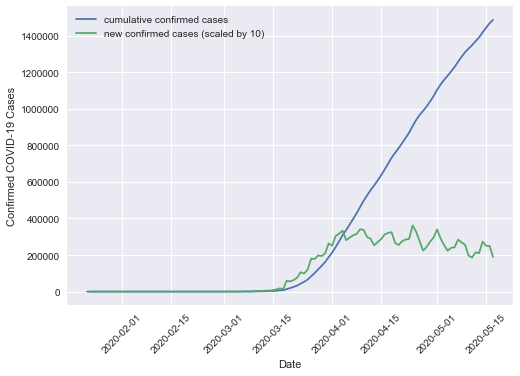

In [48]:
plt.plot(df_covid['Date'], df_covid['Confirmed'], label='cumulative confirmed cases')
plt.plot(df_covid['Date'], df_covid['Daily Confirmed']*10, label='new confirmed cases (scaled by 10)')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.ylabel('Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.show()

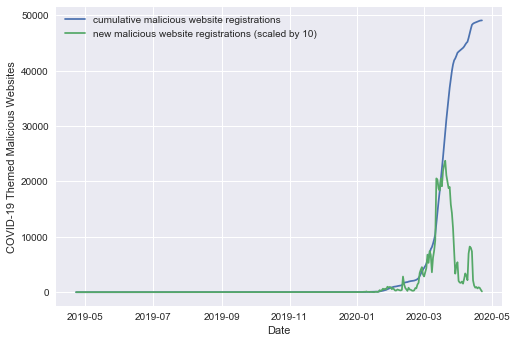

In [49]:
plt.plot(df_domains_counts['Date'], df_domains_counts['Cumulative Count'], label='cumulative malicious website registrations')
plt.plot(df_domains_counts['Date'], df_domains_counts['Count']*10, label='new malicious website registrations (scaled by 10)')
plt.legend(loc="upper left")
plt.ylabel('COVID-19 Themed Malicious Websites')
plt.xlabel('Date')
plt.show()

In [50]:
print('Mean newly registered, malicious COVID-19 themed websites per day: ' + str(round(df_domains_counts['Count'].mean(), 0)))
print('Standard deviation of newly registered, malicious COVID-19 themed websites: ' + str(round(np.std(df_domains_counts['Count']),0)))

Mean newly registered, malicious COVID-19 themed websites per day: 384.0
Standard deviation of newly registered, malicious COVID-19 themed websites: 629.0


From the plots above, we can clearly see that the outbreak of confirmed cases of COVID-19 started approximately in the middle of March. In addition, a spike in registered, malicious COVID-19 themed websites also occurred in the middle of March. Now let's view the cumulative plots side by side to get a better picture of what we are trying to model.

In [51]:
# We will use a left join to join the two dataframes as the extent of the WHOIS data only reaches 2020-04-22
df_joined = pd.merge(df_covid, df_domains_counts, on='Date', how='left')

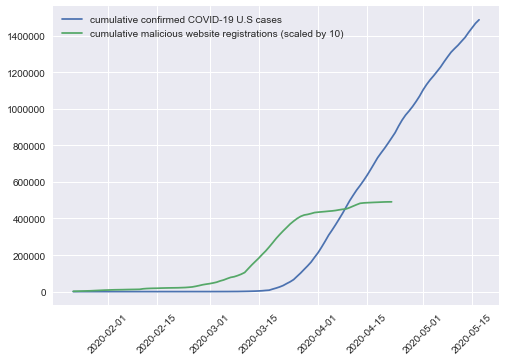

In [52]:
plt.plot(df_joined['Date'], df_joined['Confirmed'], label='cumulative confirmed COVID-19 U.S cases')

# Scale Count by 20 for better visibility
plt.plot(df_joined['Date'], df_joined['Cumulative Count']*10, label='cumulative malicious website registrations (scaled by 10)')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

From the categorical data of domains in DataFrame df3, let's extract some additional information regarding the most popular registrar name and extension for the COVID-19 themed malicious websites.

In [53]:
df_reg = df_domains_regext.groupby(['registrarName']).size()
df_reg = df_reg.to_frame()
df_reg = df_reg.reset_index()
df_reg.columns = ['Registrar', 'Count']
df_reg_sorted = df_reg.sort_values('Count', ascending=False)

In [54]:
df_reg_sorted.head()

,Registrar,Count
380,"GoDaddy.com, LLC",33528
386,Google LLC,4729
599,NAMECHEAP INC,3775
1015,"TUCOWS, INC.",2337
622,"Name.com, Inc.",1893


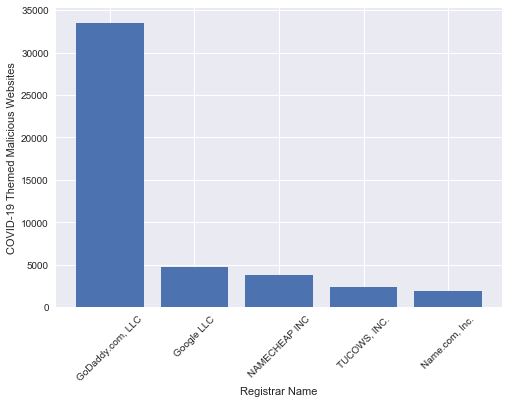

In [55]:
plt.bar(df_reg_sorted['Registrar'].iloc[:5], df_reg_sorted['Count'].iloc[:5])
plt.xticks(rotation=45)
plt.ylabel('COVID-19 Themed Malicious Websites')
plt.xlabel('Registrar Name')
plt.show()

In [56]:
df_ext = df_domains_regext.groupby(['Ext.']).size()
df_ext = df_ext.to_frame()
df_ext = df_ext.reset_index()
df_ext.columns = ['Extension', 'Count']
df_ext_sorted = df_ext.sort_values('Count', ascending=False)

In [57]:
df_ext_sorted.head()

,Extension,Count
103,.com,50925
360,.org,6289
333,.net,3466
255,.info,3440
97,.co.uk,1903


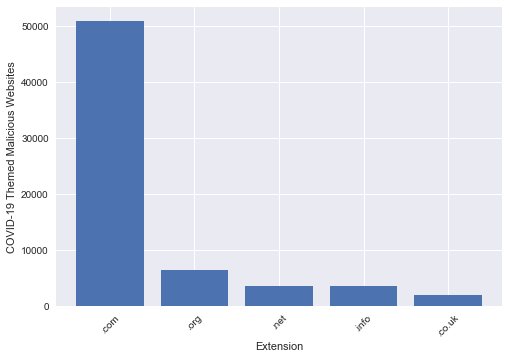

In [58]:
plt.bar(df_ext_sorted['Extension'].iloc[:5], df_ext_sorted['Count'].iloc[:5])
plt.xticks(rotation=45)
plt.ylabel('COVID-19 Themed Malicious Websites')
plt.xlabel('Extension')
plt.show()

### Modeling: Relationship between Confirmed Cases and Registered Malicious Websites

Let's first visualize the relationship between cumulative confirmed cases with the cumulative counts of malicious COVID-19 themed websites with a scatter plot. We will start by first dropping any missing data in relevant columns, which is important because the extent of the WHOIS data only reaches 2020-04-22, compared to the COVID-19 data which has entries until 2020-05-17.

In [59]:
# Drop rows with NaN values of Confirmed Change & Count to enable regression 
df_joined_noNAN = df_joined.dropna(subset=['Confirmed', 'Cumulative Count'])

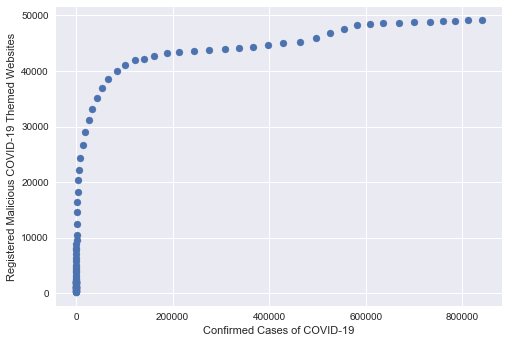

In [60]:
plt.scatter(df_joined_noNAN['Confirmed'], df_joined_noNAN['Cumulative Count'])
plt.ylabel('Registered Malicious COVID-19 Themed Websites')
plt.xlabel('Confirmed Cases of COVID-19')
plt.show()

Right off the bat, this relationship does not appear linear. Let's apply a log transformation to x, specifically log(x+1). We use log(x+1) instead of log(x) to avoid complications when computing log(0), which yields -Inf. 

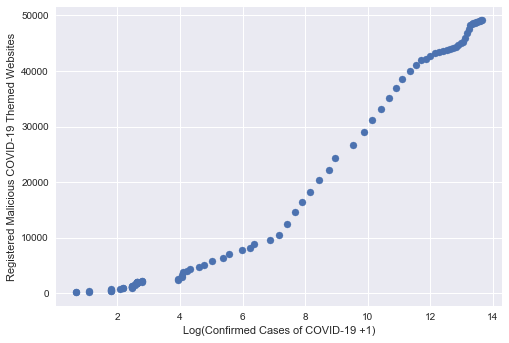

In [61]:
plt.scatter(np.log(df_joined_noNAN['Confirmed']+1), df_joined_noNAN['Cumulative Count'])
plt.ylabel('Registered Malicious COVID-19 Themed Websites')
plt.xlabel('Log(Confirmed Cases of COVID-19 +1)')
plt.show()

Now that the data looks approximately linear, let's construct a model using Scikit-Learn's LinearRegression(). Using this model, we will calculate slope, intercept, r-squared, and correlation coefficients.

In [62]:
model = LinearRegression().fit(np.log(df_joined_noNAN[['Confirmed']]+1), df_joined_noNAN[['Cumulative Count']])

In [63]:
print('Slope: ' + str(model.coef_))
print('Intercept: ' + str(model.intercept_))
print('r^2: ' + str(round(model.score(np.log(df_joined_noNAN[['Confirmed']]+1), df_joined_noNAN[['Cumulative Count']]), 3)))

Slope: [[4228.37870073]]
Intercept: [-10547.3582883]
r^2: 0.964


In [64]:
spear = spearmanr(df_joined_noNAN["Confirmed"], df_joined_noNAN["Cumulative Count"]).correlation
pear = np.corrcoef(df_joined_noNAN["Confirmed"], df_joined_noNAN["Cumulative Count"])[0][1]

In [65]:
print('Spearman Correlation Coefficient: ' + str(round(spear,5)))
print('Pearson Correlation Coefficient: ' + str(round(pear,5)))

Spearman Correlation Coefficient: 0.99924
Pearson Correlation Coefficient: 0.80814


As seen by the Spearman coefficient calculated above, Confirmed Change and Malicious COVID-19 Websites Registered are strongly, positively correlated through the entire range of dates from January to April. With the line of best fit included, our plot of the model looks like:

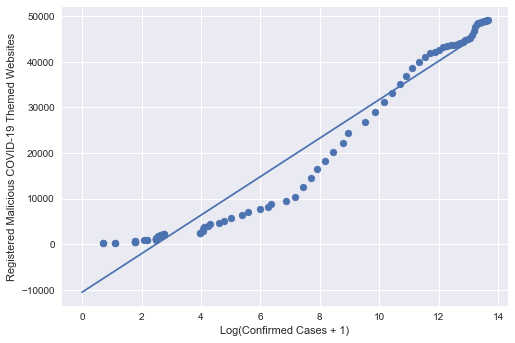

In [66]:
plt.scatter(np.log(df_joined_noNAN['Confirmed']+1), df_joined_noNAN['Cumulative Count'])
x = np.arange(14)
y = 4228.38*x - 10546.36
plt.plot(x, y)
plt.ylabel('Registered Malicious COVID-19 Themed Websites')
plt.xlabel('Log(Confirmed Cases + 1)')
plt.show()

## Evaluation of Significance

### p-value

Now that we have our model, let's evaluate its significance. To do this, we will calculate a two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.

$H_o: \beta_1 = 0$

$H_o: \beta_1 \neq 0$

When $\beta_1$ (the slope) is equal to 0, it means that there is no linear component to the relationship between x and y.

In [71]:
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
slope, intercept, r_value, p_value, std_err = linregress(np.log(df_joined_noNAN['Confirmed']+1), df_joined_noNAN['Cumulative Count'])

In [68]:
print('p-value: '+ str(p_value))

p-value: 5.1733997343027395e-67


With the p-value calculated to be < 0.01, we can reject the null hypothesis and conclude with 99% confidence that the slope is statistically significant and is nonzero.

### Random Permutations

In [69]:
def permuted_y():
    return np.random.permutation(df_joined_noNAN['Cumulative Count'].copy())

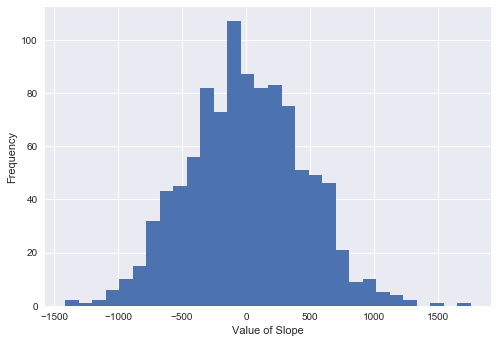

In [70]:
slopes = []
for i in range(1000):
    model_perm = LinearRegression().fit(np.log(df_joined_noNAN[['Confirmed']]+1), permuted_y())
    slopes.append(model_perm.coef_[0])
    
plt.hist(slopes, bins=30)
plt.ylabel('Frequency')
plt.xlabel('Value of Slope')
plt.show()

The actual slope of 4228.3787 was definitely not likely to be a result of random chance. As seen above in the histogram of the 1000 slopes generated by permuting y, the value of the slope ranges from approximately -1500 to 1500, and the distribution is centered at ~0. 

## Conclusion

In the initial summary of the data, I decided that calculating the mean and standard deviation of the cumulative data was not very insightful, so I decided to stick with daily data. From the U.S COVID-19 data, I learned that there was an average change of 12,656 new confirmed cases, 2200 new recoveries, and 768 new deaths per day. In addition, I found the variance and spread of these daily data to be high, with standard deviations of 13416, 4583, and 915 cases respectively. The overall high variance of the daily COVID-19 data is expected, as its observations are directly tied to inconsistent testing and the high speed of the epidemic. In regards to the WHOIS domain data, there was an average of 384 newly registered, malicious COVID-19 themed websites per day. The data also had a high spread and variance, with a standard deviation of 629 registrations. 

From my analysis of the categorical data of malicious COVID-19 themed domains, I found GoDaddy to be the most popular registrar for malicious COVID-19 themed websites, followed by NameCheap, Google, Tucows, and Name.com, with GoDaddy being seven times more popular than NameCheap. In addition, I found the top five most popular extensions for these malicous websites to be .com, .org, .net, .info, and .co.uk, with .com being eight times more popular than .org domains.

From my linear model of log(Confirmed Cases + 1) and Malicious COVID-19 Themed Websites, I found the coefficient of determination ($r^2$) to be 0.964, indicating that 96.4% of the variability of the response data was around its mean. In other words, the model fit the data well. From the Pearson and Spearman correlation coefficients (0.808 and 0.999 respectively), I determined the regression variables to be strongly, positively correlated. 

In addition, I found that the slope was statistically significant using hypothesis testing at $\alpha=0.01$ and permutation testing. In the real-world context, we can interpret the slope as an increase of registered, malicious COVID-19 themed websites by 42 units per 1% increase in confirmed cases of COVID-19 (the transformation log(x + 1) retains the same interpretation as a log(x) transformation). In other words, as the gravity of the pandemic increased (in terms of confirmed cases), the number of malicious COVID-19 themed website registrations also increased. 

Taking a closer look at the graph of non-cumulative malicious COVID-19 themed domain registrations, I found it interesting that the curve had a sudden dip in late March after peaking at 2,375 registrations per day. One possible explanation for the sudden decreased rate of these registrations could be due to the cracking down on malicious activity by various registrars; on March 20th, the Attorney General of New York sent letters to registrars, urging them to stop the registration and use of internet domain names by individuals trying to unlawfully and fraudulently profit off consumers’ fears around the coronavirus disease. In addition, in early April, ICANN sent out an email urging hundreds of registrars to suspend websites with coronavirus-themed scams.

## Source Code

Github repository for this project: https://github.com/jzhr/info2950final

## Acknowledgments

_1._ https://stats.stackexchange.com/questions/1444/how-should-i-transform-non-negative-data-including-zeros). 

_2._ https://stats.stackexchange.com/questions/18694/back-transformation-and-interpretation-of-logx1-estimates-in-multiple-line

_3._ https://ag.ny.gov/press-release/2020/attorney-general-james-asks-godaddy-and-other-online-registrars-halt-and-de-list

_4._ https://nakedsecurity.sophos.com/2020/04/14/icann-asks-registrars-to-crack-down-on-scam-coronavirus-websites/

_5._ https://www.zdnet.com/article/domain-name-registrar-suspends-600-suspicious-coronavirus-websites/

_7._ https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/

_8._ https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [1]:
%%javascript
let words = 0;
Jupyter.notebook.get_cells().forEach(cell => {if (cell.cell_type == "markdown") { words += cell.element[0].innerText.split(" ").length }})
element.text("markdown words: " + words)

<IPython.core.display.Javascript object>